In [1]:
# this code loads the data

In [2]:
# import packages for S3 object
from cloudpathlib import S3Path, S3Client
from pathlib import Path

In [3]:
from utilities import ls, crawl 
from cloudpathlib import CloudPath, S3Client
import nibabel as nib
import numpy as np

In [4]:
import nilearn
import matplotlib.pyplot as plt

In [5]:
# load the S3 object first
# Set up our cache path:
cache_path = Path('/tmp/cache')
if not cache_path.exists():
    cache_path.mkdir()

# Create the root S3Path for the NSD:
nsd_base_path = S3Path(
    's3://natural-scenes-dataset/',
    client=S3Client(
        no_sign_request=True,
        local_cache_dir=cache_path))

In [6]:
# get the path for subject 1
session_num = 1
subject_id = 'subj01'
resolution = 'func1mm'
filename = f'betas_session{session_num:02d}.nii.gz'  # zero-padded
file_path = nsd_base_path / 'nsddata_betas' / 'ppdata' / subject_id / resolution / 'betas_fithrf_GLMdenoise_RR' / filename
print(f"Loading {file_path}")

# load functional image by load
func_img = nib.load(file_path.fspath)
# get dataobj instead of the nii file
func_img_dat = func_img.dataobj

Loading s3://natural-scenes-dataset/nsddata_betas/ppdata/subj01/func1mm/betas_fithrf_GLMdenoise_RR/betas_session01.nii.gz


In [7]:
# transform the dataobj into a numpy array
# takes around 10 seconds
func_img_dat = np.asanyarray(func_img_dat)

In [8]:
# mask the left MTL lobe first
# where is MTL mask?
mask_path = nsd_base_path / 'nsddata' / 'ppdata' / 'subj01' / 'func1mm' / 'roi'
masks = ['MTL']

In [9]:
# get path to a specific mask
i = 0
mask_path_current = mask_path / f'{masks[0]}.nii.gz'
mask_path_current

S3Path('s3://natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/roi/MTL.nii.gz')

In [10]:
# get mask image
mask_img = nib.load(mask_path_current.fspath)

In [11]:
func_img_map = func_img.dataobj

In [12]:
# get the dataobject of the masked image to manipulate it
mask_img_dat = np.asanyarray(mask_img.dataobj)

In [31]:
sub_rois = np.arange(11)
for i in sub_rois: print(i)
sub_rois[0]

0
1
2
3
4
5
6
7
8
9
10


0

In [14]:
# This will be a function to create masked image
# create masked image
i = 5
masked_img = (mask_img_dat == i).astype(bool)
# this function returns the masked image
func_img_dat[masked_img, :].shape

In [15]:
np.sum(masked_img)

1464

Text(0.5, 1.0, 'Sagittal (X) slice')

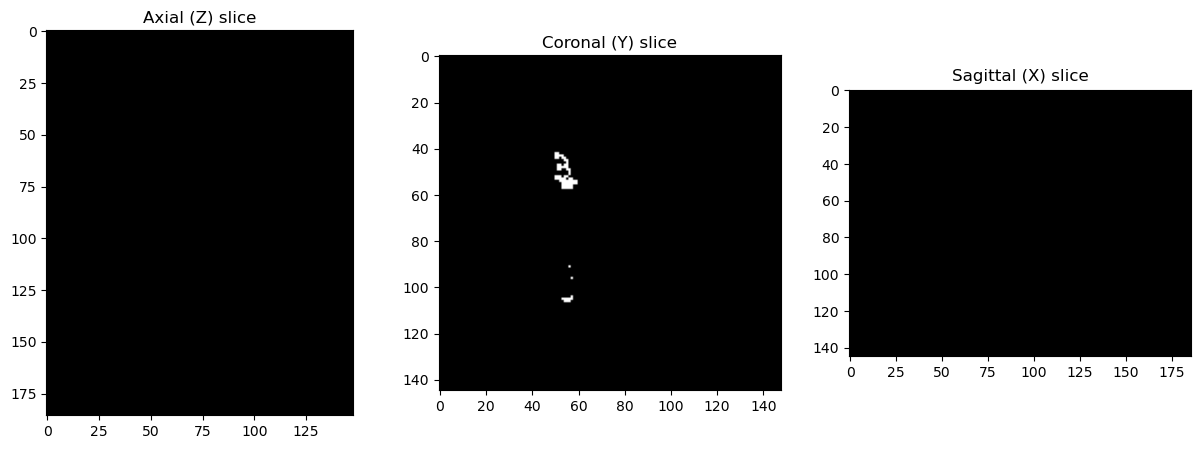

In [38]:
# Plot slices from each axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(masked_img[masked_img.shape[0] // 2, :, :], cmap='gray')
axes[0].set_title('Axial (Z) slice')

axes[1].imshow(masked_img[:, masked_img.shape[1] // 2, :], cmap='gray')
axes[1].set_title('Coronal (Y) slice')

axes[2].imshow(masked_img[:, :, masked_img.shape[2] // 2], cmap='gray')
axes[2].set_title('Sagittal (X) slice')

(1464, 750)

In [41]:
masked_img.shape

(145, 186, 148)

In [45]:
# 

In [61]:
func_img_masked.dtype

dtype('<i2')

In [ ]:
# mask their MTL

In [ ]:
# select 

In [ ]:
# filter the file and select the rows

In [ ]:
# ers